# Homework #1

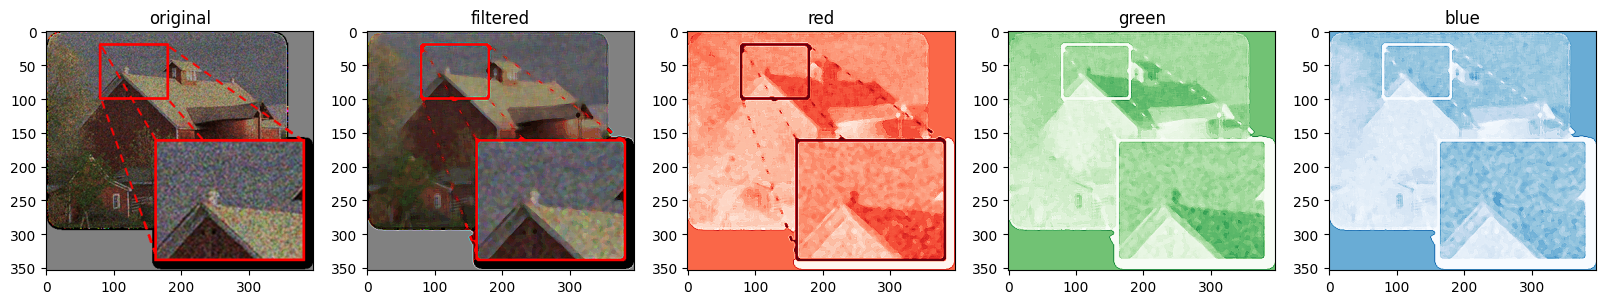

In [87]:
# homework1 --> do not modify/remove this first line and do not add anything before this line
# do not change function name / variable name
# make sure that this block can successfully run on its own without error

# import library below
import cv2
import numpy as np
import matplotlib.pyplot as plt

def filter_fn(image, L):
    # first part -> m = (L/8) / (3L/8)
    if image < (3*L//8):
        image /= 3
    # second part -> m = (6L/8) / (2L/8)
    elif image >= (3*L//8) and image <= (5*L//8):
        image = image*3 - (8*L//8)
    # last part -> m = (L/8) / (3L/8)
    elif image > (5*L//8):
        image = image/3 + (16*L//24)

    return image

def homework1_1(image_grayscale):
    # input -> image_grayscale - type -> np.ndarray, size of - (height, width)
    # output -> image_grayscale - type -> np.ndarray, size of - (height, width)

    # TO DO - Implement transformation based on the contrast stretching graph
    filtered_image = np.copy(image_grayscale)

    vmin = np.min(image_grayscale.flatten())
    vmax = np.max(image_grayscale.flatten())
    L = vmax - vmin

    filtered_image = np.vectorize(filter_fn)(filtered_image, L)

    return filtered_image


def homework1_2(rgbimage, 
                medianBlurSize = 7):
    # input -> rgbimage - type -> np.ndarray, size of - (height, width, 3)
    # output -> filtered_image - type -> np.ndarray, size of - (height, width, 3)

    # TO DO - Design your own filter
    filtered_image = np.array(rgbimage)

    CHANNELS, SIZE = rgbimage.shape[2], rgbimage.shape[:2]

    KERNEL_SIZE = 3
    KERNEL_SHAPPEN = np.zeros((KERNEL_SIZE, KERNEL_SIZE, 3), dtype=np.float32)
    KERNEL_SHAPPEN[KERNEL_SIZE//2, KERNEL_SIZE//2, :] = 5
    KERNEL_SHAPPEN[0, KERNEL_SIZE//2, :] = -1
    KERNEL_SHAPPEN[KERNEL_SIZE-1, KERNEL_SIZE//2, :] = -1
    KERNEL_SHAPPEN[KERNEL_SIZE//2, KERNEL_SIZE-1, :] = -1
    KERNEL_SHAPPEN[KERNEL_SIZE//2, 0, :] = -1
    
    # apply filter 3D
    # blur
    for c in range(CHANNELS):
        # filtered_image[:, :, c] = cv2.filter2D(filtered_image[:, :, c], -1, KERNEL_BLUR[:, :, c])
        filtered_image[:, :, c] = cv2.medianBlur(filtered_image[:, :, c], ksize=medianBlurSize)
    # shappen
    for c in range(CHANNELS):
        filtered_image[:, :, c] = cv2.filter2D(filtered_image[:, :, c], -1, KERNEL_SHAPPEN[:, :, c])

    return filtered_image
    


def plot_kernel_result(mock_img):
    plt.figure(figsize=(20,20))
    plt.subplot(1,5,1)
    plt.title('original')
    plt.imshow(mock_img)
    plt.subplot(1,5,2)
    plt.title('filtered')
    plt.imshow(homework1_2(mock_img))
    plt.subplot(1,5,3)
    plt.title('red')
    plt.imshow(homework1_2(mock_img)[:, :, 0], cmap = 'Reds')
    plt.subplot(1,5,4)
    plt.title('green')
    plt.imshow(homework1_2(mock_img)[:, :, 1], cmap = 'Greens')
    plt.subplot(1,5,5)
    plt.title('blue')
    plt.imshow(homework1_2(mock_img)[:, :, 2], cmap = 'Blues')
    plt.show()

# mock_img = cv2.imread('../week 2/rgb2.png')[:, :, ::-1]
# plot_kernel_result(mock_img)
# mock_img2 = cv2.imread('../assets/calibration.jpg')[:, :, ::-1]
# plot_kernel_result(mock_img2)
# mock_img3 = cv2.imread('../assets/line.jpeg')[:, :, ::-1]
# plot_kernel_result(mock_img3)
mock_img4 = cv2.imread('./Effect-of-demosaicing-on-low-light-noise-characteristics-a-RGB-image-with-spatially.png')[:, :, ::-1]
plot_kernel_result(mock_img4)


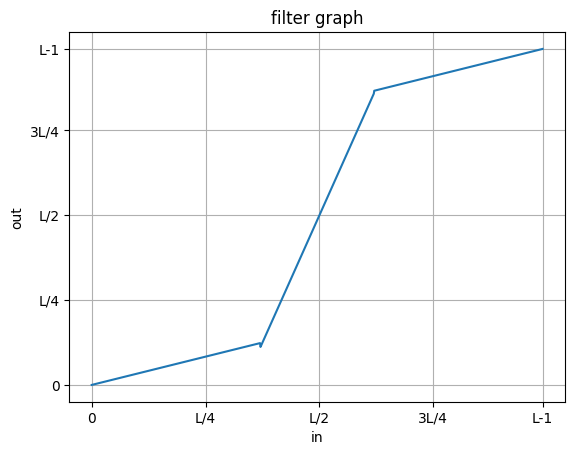

In [88]:
r = np.linspace(0,99,1000)
s = np.vectorize(filter_fn)(r,100)
plt.title('filter graph')
plt.plot(r, s)
plt.xlabel('in')
plt.ylabel('out')
plt.xticks([0, 25, 50, 75, 99], ['0', 'L/4', 'L/2', '3L/4', 'L-1'])
plt.yticks([0, 25, 50, 75, 99], ['0', 'L/4', 'L/2', '3L/4', 'L-1'])
plt.grid()

In [89]:
# fill in  {___Fill____} below
import cv2
import numpy as np
import matplotlib.pyplot as plt

def homework1_4 (rgbImage):
    # Convert the image to grayscale
    grayImg = cv2.cvtColor(rgbImage, cv2.COLOR_BGR2GRAY)

    # 4.1 Use the median filter to smooth the image
    smoothed_img = cv2.medianBlur(grayImg, 5)

    # 4.2 Make ROI with
    # Create an interesting area
    mark = np.ones((smoothed_img.shape[0], smoothed_img.shape[1]), dtype=np.uint8) * 255
    # Set the coordinates of the rectangle
    start_point = (300, 275)
    end_point = (300+435, 275+380)

    # Draw a black square at the center
    cv2.rectangle(mark ,start_point, end_point, (0), -1)
    # Mark the area in the image
    mark_ROI = cv2.bitwise_not(mark) & smoothed_img

    # 4.3 Use Gray Level slicing
    Gray_Level_img = mark_ROI.copy()
    L = 255
    Gray_Level_img[(mark_ROI >= (L*7/8))]  = 255
    Gray_Level_img[(mark_ROI < (L*7/8))] = 0

    # Picture show Row1
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 2, 1)
    plt.imshow(rgbImage[:, :, ::-1])
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(smoothed_img, cmap='gray')
    plt.title('Image after smoothing')
    plt.axis('off')

    # Picture show Row2
    plt.subplot(2, 2, 3)
    plt.imshow(mark_ROI, cmap='gray')
    plt.title('Mark ROI Image')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(Gray_Level_img, cmap='gray')
    plt.title('Segmentation with transformation img')
    plt.axis('off')

    plt.savefig('homework1_4.png')
    plt.show()


# Test your functions

In [90]:
!wget -nc 'https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe' -O kitty.jpg
!wget -nc 'https://drive.google.com/uc?id=1mIO58Oat2rxLg-c82eN2TLH8sTucQJGI' -O noisy_ct.jpg

File ‘kitty.jpg’ already there; not retrieving.
File ‘noisy_ct.jpg’ already there; not retrieving.


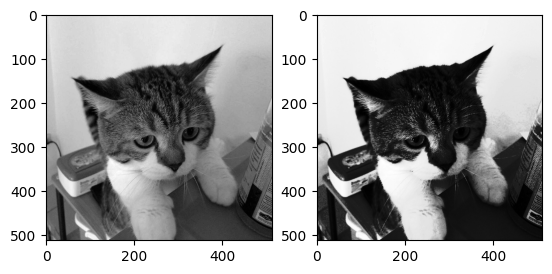

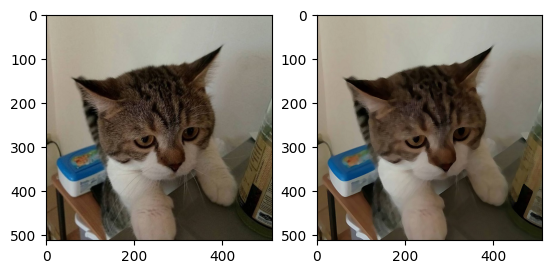

In [91]:
# test your function
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("kitty.jpg")
plt.subplot(1,2,1)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')
img_hw1 = homework1_1(img_gray)
plt.subplot(1,2,2)
plt.imshow(img_hw1,cmap = 'gray')
plt.savefig('homework1_1.png')
plt.show()

img = cv2.imread("kitty.jpg")[:,:,::-1]
plt.subplot(1,2,1)
plt.imshow(img)
img_hw2 = homework1_2(img)
plt.subplot(1,2,2)
plt.imshow(img_hw2)
plt.savefig('homework1_2.png')
plt.show()

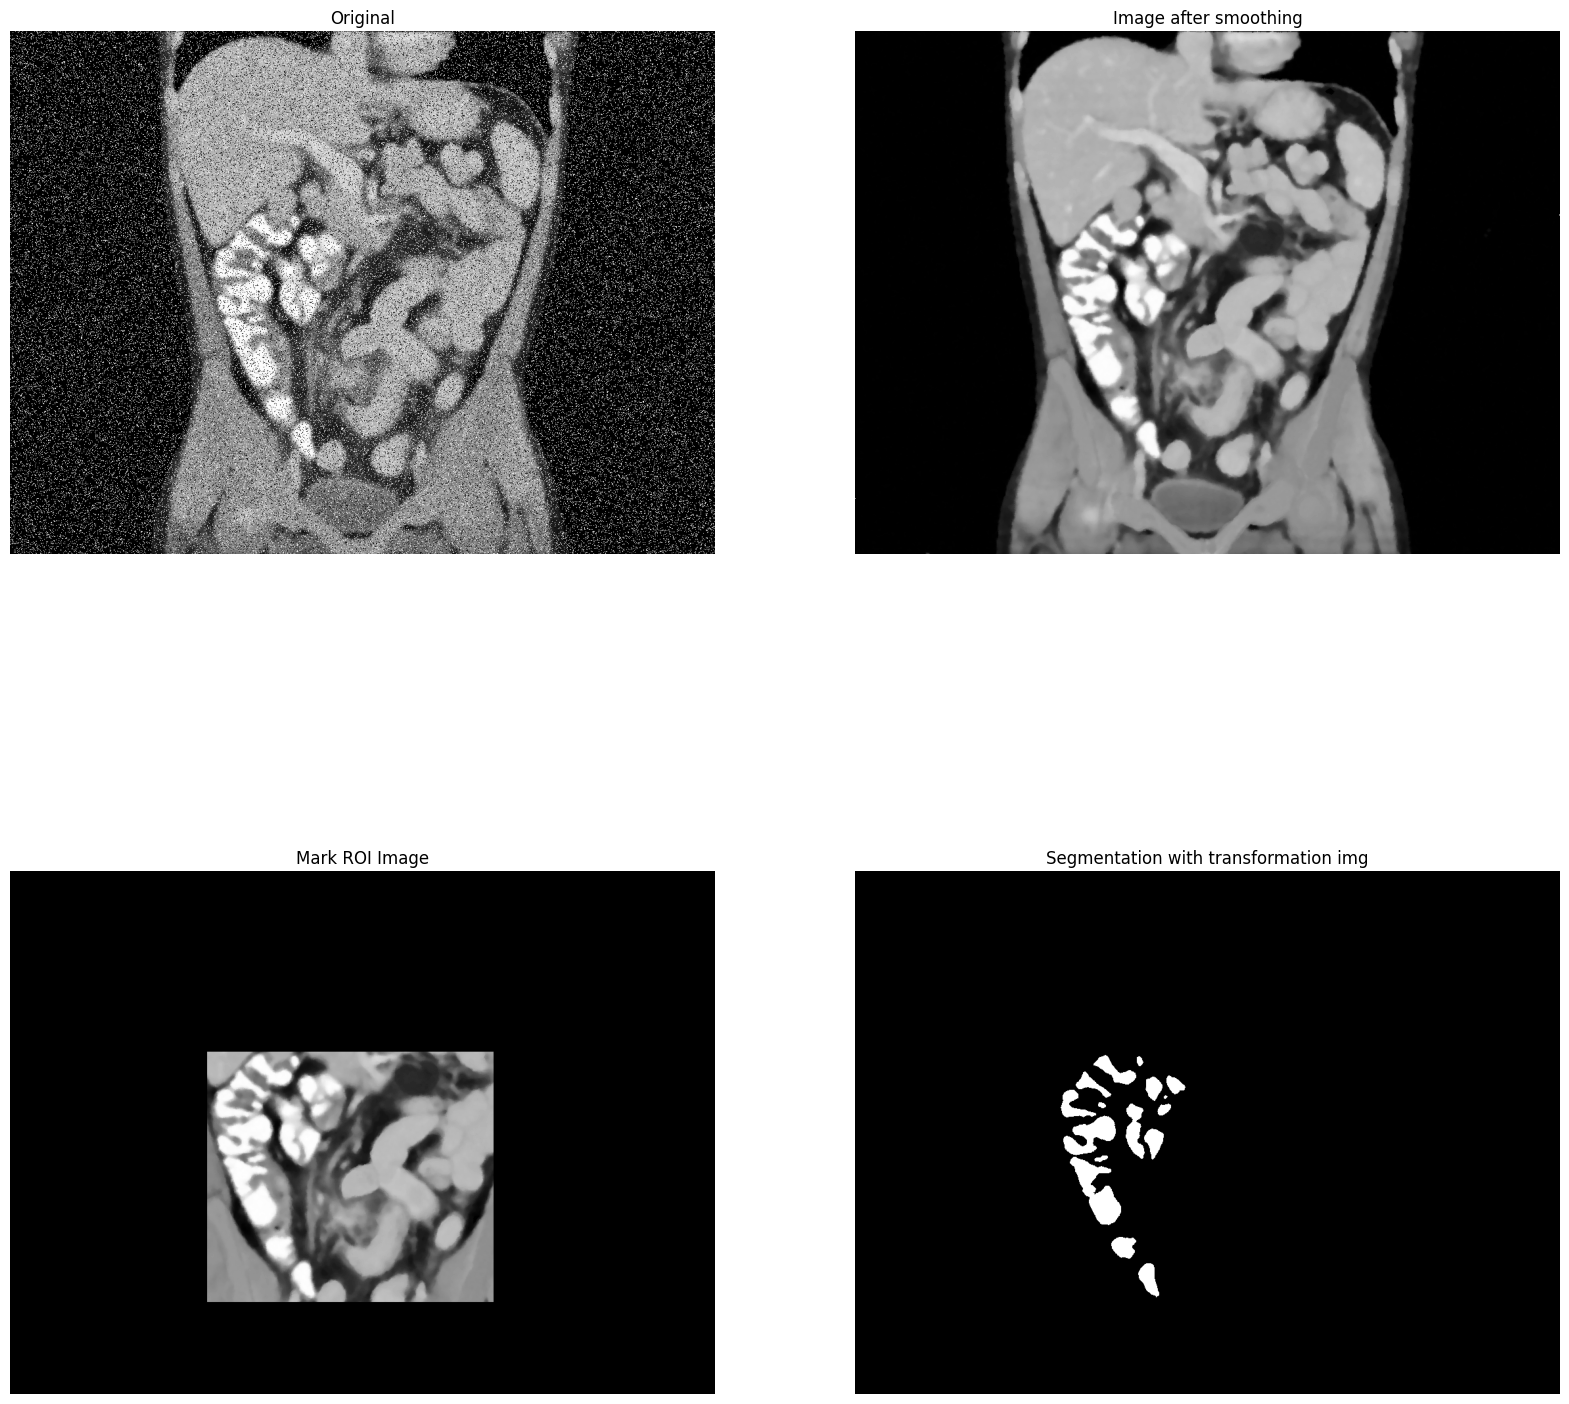

In [92]:
img14 = cv2.imread("noisy_ct.jpg")
homework1_4(img14)

# [Optional] problem 3

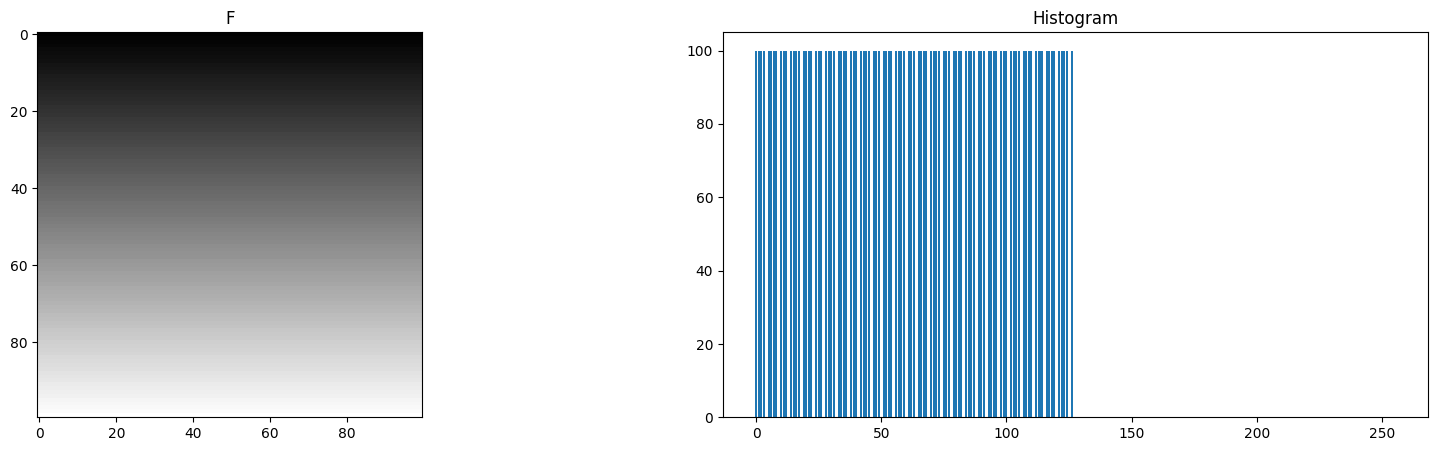

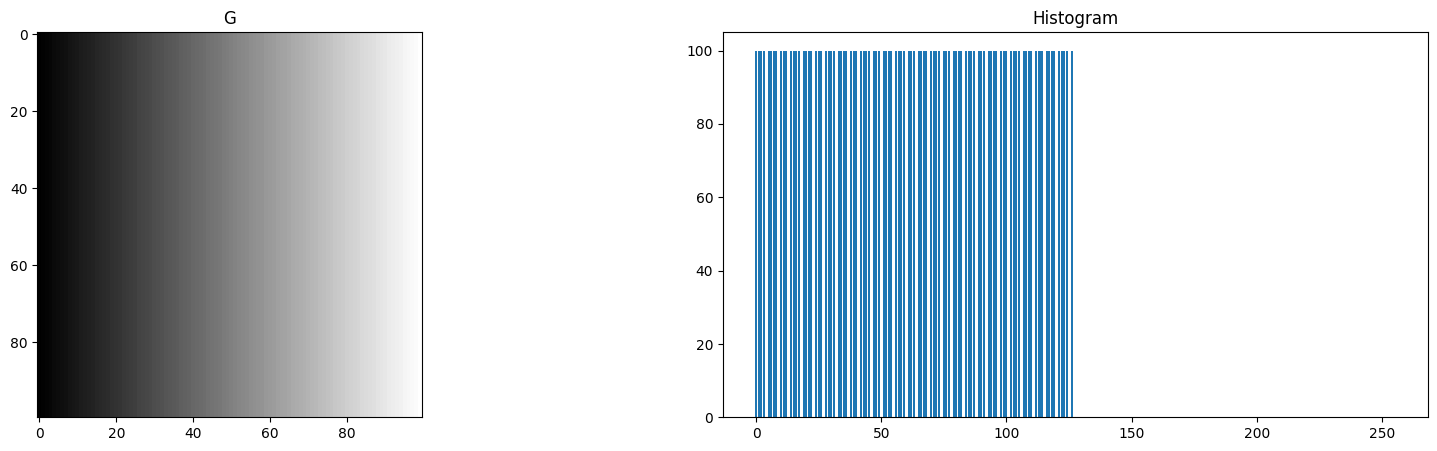

In [94]:
IMAGE_SIZE = (100, 100)
F = np.zeros(IMAGE_SIZE, dtype=np.uint8)
G = np.zeros(IMAGE_SIZE, dtype=np.uint8)

for i in range(IMAGE_SIZE[0]):
    for j in range(IMAGE_SIZE[1]):
        # to aviod overflow -> set value at max as 255//2
        F[i][j] = (i/IMAGE_SIZE[0]) * 255//2
        G[i][j] = (j/IMAGE_SIZE[1]) * 255//2

F = cv2.cvtColor(F, cv2.COLOR_GRAY2BGR)[:, :, 0]
G = cv2.cvtColor(G, cv2.COLOR_GRAY2BGR)[:, :, 0]

def show_hist(img, title = 'Image'):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title('Histogram')
    img_hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    plt.bar(range(0,256), img_hist[:, 0])
    plt.show()

show_hist(F, 'F')
show_hist(G, 'G')

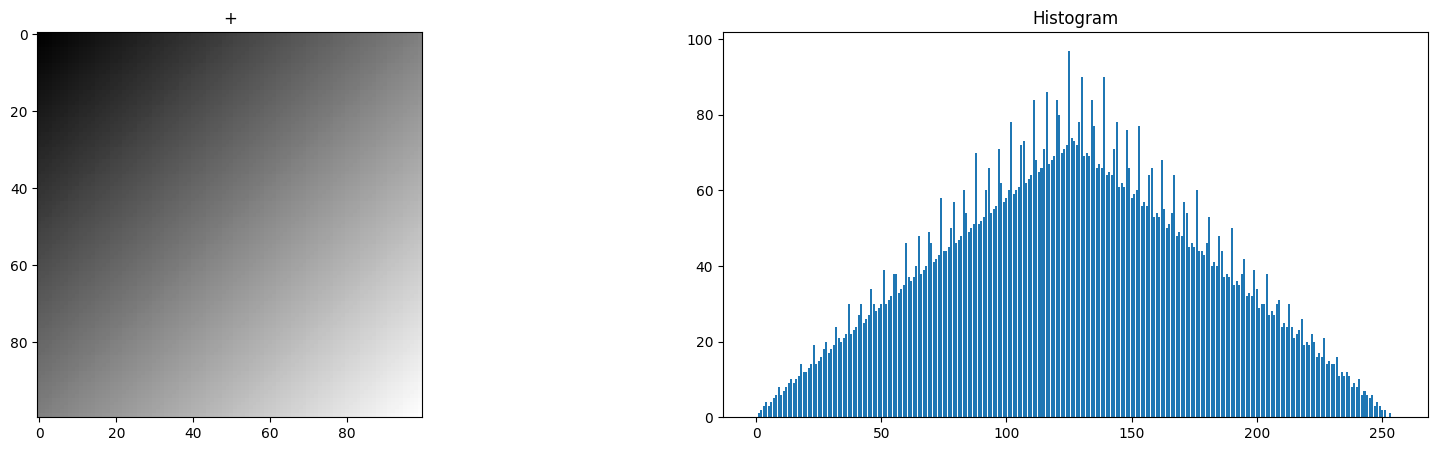

In [95]:
'''
f(x,y) + g(x,y)
'''

def op(img1, img2, operator):
    ret = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)[:, :, 0]
    img2 += 1
    for i in range(IMAGE_SIZE[0]):
        for j in range(IMAGE_SIZE[1]):
            ret[i][j] = max(min(operator(float(img1[i][j]), img2[i][j]), 255), 0)

    return ret

show_hist(op(F, G, lambda x,y : x+y), '+')


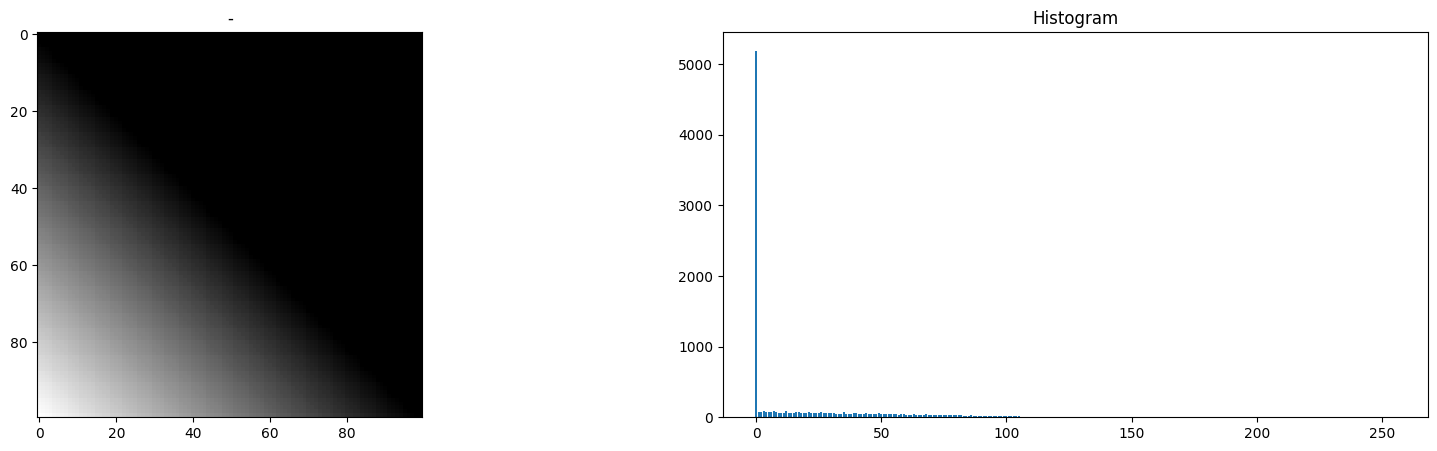

In [96]:
'''
f(x,y) - g(x,y)
'''

show_hist(op(F, G, lambda x,y : x-y), '-')

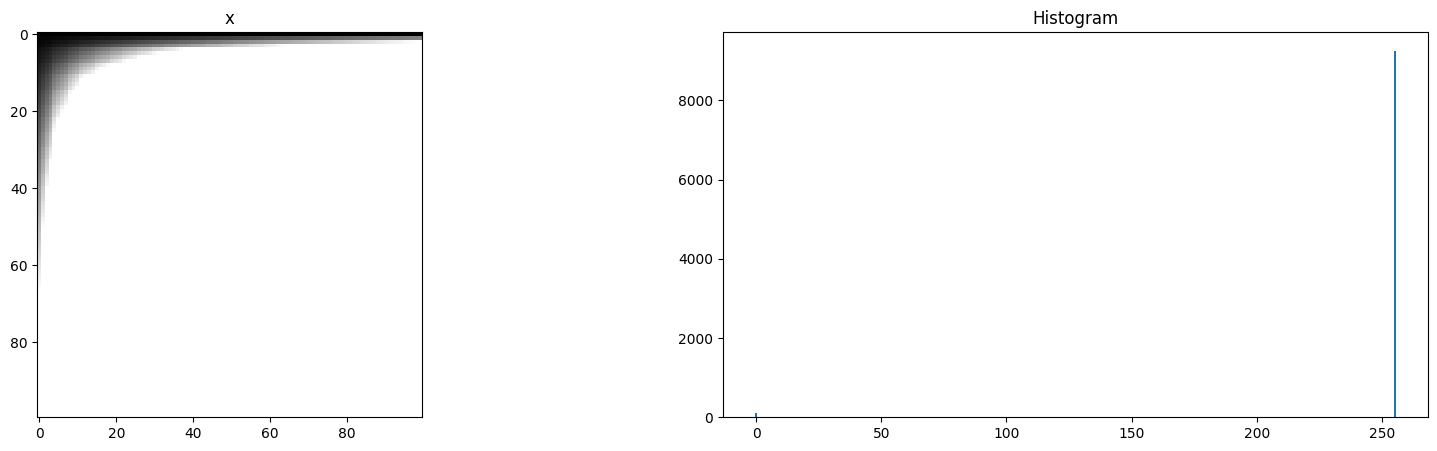

In [97]:
'''
f(x,y) * g(x,y)
'''

show_hist(op(F, G, lambda x,y : x*y), 'x')

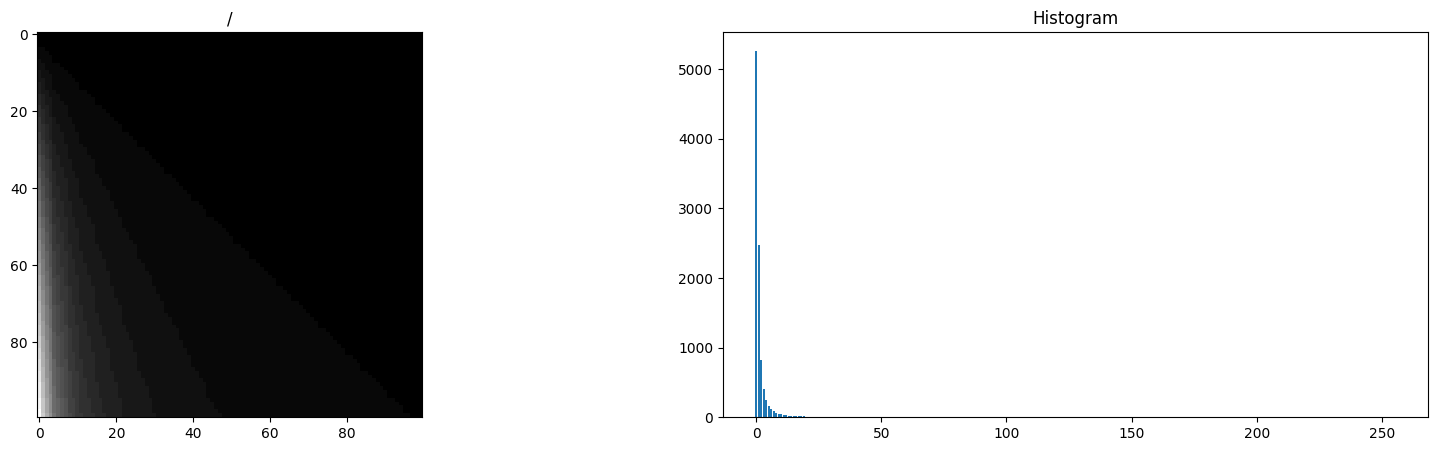

In [98]:
'''
f(x,y) / g(x,y)
'''
show_hist(op(F, G, lambda x,y : x/y), '/')